In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm

plt.rcParams['svg.fonttype'] = 'none'

In [3]:
### REPLACE with path to AnnData downloaded from GCP ###
data_dir = '/Users/adaly/Documents/mouse_colon/csplotch_anndata'
adata_lambdas = sc.read_h5ad(os.path.join(data_dir, 'adata_csplotch_lambdas.h5ad'))

### REPLACE with path to AnnData downloaded from GCP ###
data_dir = '/Users/adaly/Dropbox (Simons Foundation)/cell_segmentation_colon/snrna_anndata/'
adata_snrna = sc.read_h5ad(os.path.join(data_dir, 'adata_larger_relabeling_after_tsne_stemfiltered_renamed.h5ad'))

In [4]:
# Rename TA7 to TA6 (there is no TA6 currently)
cats = adata_snrna.obs.pheno_cell_types.cat.categories.values
cats[cats == 'TA_7'] = 'TA_6'

adata_snrna.rename_categories('pheno_cell_types', cats)
adata_snrna.obs.pheno_cell_types.cat.categories

/Users/adaly/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)
Omitting pheno_minor_cell_types/logfoldchanges as old categories do not match.
Omitting pheno_minor_cell_types/names as old categories do not match.
Omitting pheno_minor_cell_types/pvals as old categories do not match.
Omitting pheno_minor_cell_types/pvals_adj as old categories do not match.
Omitting pheno_minor_cell_types/scores as old categories do not match.


Index(['B_cell', 'Colonocyte_1', 'Colonocyte_2', 'Cycling_TA_1',
       'Cycling_TA_2', 'Enteroendocrine_1', 'Enteroendocrine_2',
       'Fibroblast_1', 'Fibroblast_2', 'Glia', 'Goblet', 'Lymphatic',
       'Macrophage', 'Mesothelial', 'Myocyte_1', 'Myocyte_2', 'Neuron_1',
       'Neuron_2', 'Neuron_3', 'Neuron_4', 'Stem_1', 'Stem_2', 'TA_1', 'TA_2',
       'TA_3', 'TA_4', 'TA_5', 'TA_6', 'T_cell', 'Tuft', 'Vascular'],
      dtype='object')

In [5]:
cmap = cm.get_cmap('tab20')
pmaj_colors = {
    'B': cmap(0),
    'Colonocyte': cmap(0.1),
    'Cycling': cmap(0.2),
    'Enteroendocrine': cmap(0.3),
    'Fibroblast': cmap(0.4),
    'Glia': cmap(0.5),
    'Goblet': cmap(0.6),
    'Lymphatic': cmap(0.8),
    'Macrophage': cmap(0.9),
    'Mesothelial': cmap(0.05),
    'SMC': cmap(0.15),
    'Neuron': cmap(0.25),
    'Stem': cmap(0.35),
    'T': cmap(0.45),
    'TA': cmap(0.55),
    'Tuft': cmap(0.65),
    'Vascular': cmap(0.85)
}

In [6]:
p_colors = {
    'B_cell': (244,233,44,255),
    'Colonocyte_1': (103,196,216,255),
    'Colonocyte_2': (174,85,146,255),
    'Cycling_TA_1': (222,73,72,255),
    'Cycling_TA_2': (16,128,64,255),
    'Enteroendocrine_1': (25,101,148,255),
    'Enteroendocrine_2': (145,36,82,255),
    'Fibroblast_1': (248,216,222,255),
    'Fibroblast_2': (106,69,35,255),
    'Glia': (40,48,120,255),
    'Goblet': (132,195,144,255),
    'Lymphatic': (173,145,94,255),
    'Macrophage': (20,68,60,255),
    'Mesothelial': (147,167,202,255),
    'Myocyte_1': (143,119,124,255),
    'Myocyte_2': (66,22,24,255),
    'Neuron_1': (122,144,137,255),
    'Neuron_2': (92,54,66,255),
    'Neuron_3': (38,61,33,255),
    'Neuron_4': (88,177,70,255),
    'Stem_1': (74,92,153,255),
    'Stem_2': (65,53,68,255),
    'TA_1': (220,53,115,255),
    'TA_2': (90,90,81,255),
    'TA_3': (167,37,41,255),
    'TA_4': (101,115,53,255),
    'TA_5': (47,177,144,255),
    'TA_6': (239,163,140,255),
    'T_cell': (232,139,175,255),
    'Tuft': (153,54,130,255),
    'Vascular': (192,93,45,255)
}
for k,v in p_colors.items():
    p_colors[k] = np.array(v)/255

In [7]:
mroi_short2long = {
    'APEX': 'crypt apex',
    'MID': 'crypt mid',
    'BASE': 'crypt base',
    'SUB-CRYPT': 'sub-crypt',
    'PP': "peyer's patch",
    'CM': 'cross-mucosa',
    'EMM': 'epithelium and mucosae',
    'EMMSUB': 'epithelium and mucosae and submucosa',
    'ALL': 'epithelium and muscle and submucosa',
    'ME': 'externa',
    'MEI': 'externa and interna',
    'MI': 'interna',
    'MMI': 'interna and mucosae',
    'MSUB': 'muscle and submucosa'
}
mroi_colors = {
    'MEI': (228,219,159,255),
    'ME': (183,172,150,255),
    'MI': (204,165,164,255),
    'MMI': (214,188,210,255),
    'MSUB': (206,176,204,255),
    'APEX': (241,149,187,255),
    'BASE': (188,165,197,255),
    'MID': (163,163,198,255),
    'PP': (154,161,196,255),
    'SUB-CRYPT': (165,215,235,255),
    'CM': (179,221,214,255),
    'ALL': (179,221,214,255),
    'EMMSUB': (171,217,185,255),
    'EMM': (162,193,160,255)
}
for k,v in mroi_colors.items():
    mroi_colors[k] = np.array(v)/255

### Fig 1: breakdown of snRNA-seq dataset by cell type

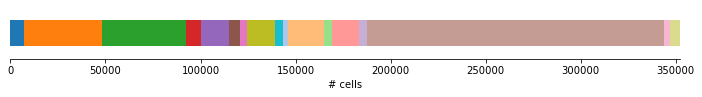

In [161]:
counts_per_type = {}
for ct in pmaj_colors.keys():
    assert ct in adata_snrna.obs['pheno_major_cell_types'].values, ct
    counts_per_type[ct] = [np.sum(adata_snrna.obs['pheno_major_cell_types'] == ct)]

df_cpt = pd.DataFrame(counts_per_type)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,1.5), color=pmaj_colors, legend=False)
#ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('# cells')
ax.set_xlim(0, len(adata_snrna.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_sndata_composition_k17.svg')

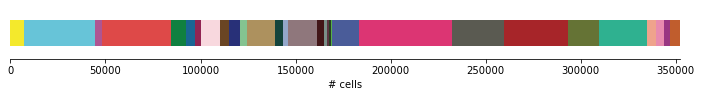

In [164]:
counts_per_type = {}
for ct in p_colors.keys():
    assert ct in adata_snrna.obs['pheno_cell_types'].values, ct
    counts_per_type[ct] = [np.sum(adata_snrna.obs['pheno_cell_types'] == ct)]

df_cpt = pd.DataFrame(counts_per_type)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,1.5), color=p_colors, legend=False)
#ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('# cells')
ax.set_xlim(0, len(adata_snrna.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_sndata_composition_k31.svg')

### Fig 1: breakdown of ST dataset by age and colon region

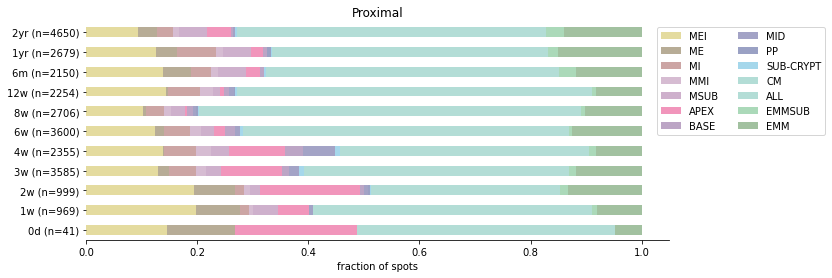

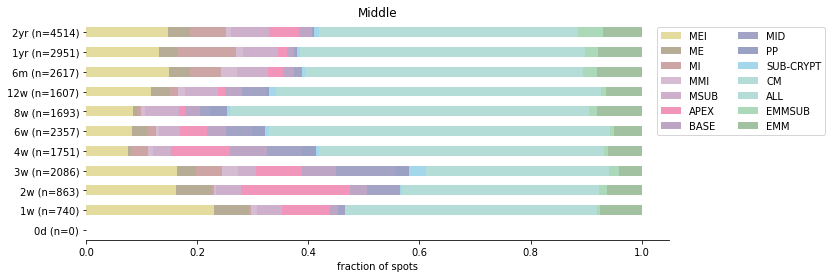

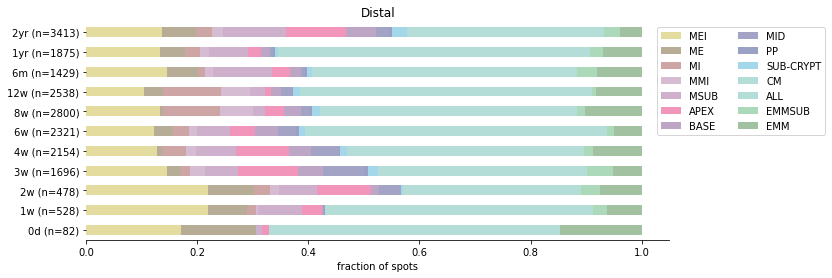

In [129]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '1yr', '2yr']

for reg in ['Proximal', 'Middle', 'Distal']:
    obs = adata_lambdas.obs[adata_lambdas.obs.Region == reg]
    
    counts_per_type = dict([(ct, []) for ct in mroi_colors.keys()])
    n_per_age = []
    
    for a in ages:
        if a.endswith('w'):
            obs_age = obs[obs.Age == a]
        elif a == '0d':
            obs_age = obs[obs.Age == '0w']
        elif a == '6m':
            obs_age = obs[obs.Age == '26w']
        elif a == '1yr':
            obs_age = obs[obs.Age == '52w']
        elif a == '2yr':
            obs_age = obs[obs.Age == '104w']
        else:
            raise ValueError
        n_per_age.append(len(obs_age))
        
        for mroi in mroi_colors.keys():
            if len(obs_age) > 0:
                counts_per_type[mroi].append(np.sum(obs_age.annotation == mroi_short2long[mroi]) / len(obs_age))
            else:
                counts_per_type[mroi].append(0)
        
    df_cpt = pd.DataFrame(counts_per_type, index=ages)
    
    ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,4), color=mroi_colors)
    ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(0.97, 1.0))
    ax.set_xlabel('fraction of spots')
    ax.set_yticklabels(['%s (n=%d)' % (a,n) for a,n in zip(ages, n_per_age)])
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.set_title(reg)
    
    plt.subplots_adjust(right=0.8)
    plt.savefig('fig1_stdata_composition_%s.svg' % reg, format='SVG')
    plt.show()

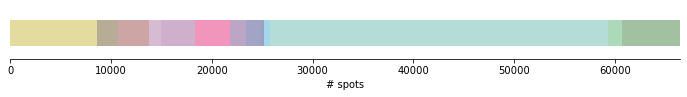

In [11]:
# One-line version of above

counts_per_mroi = {}
for mroi in mroi_colors.keys():
    counts_per_mroi[mroi] = [np.sum(adata_lambdas.obs['annotation'] == mroi_short2long[mroi])]

df_mroi = pd.DataFrame(counts_per_mroi)

ax = df_mroi.plot(kind='barh', stacked=True, figsize=(12,1.5), color=mroi_colors, legend=False)
ax.set_xlabel('# spots')
ax.set_xlim(0, len(adata_lambdas.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_stdata_composition_oneline_mroi.svg')

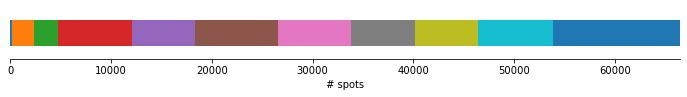

In [18]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '1yr', '2yr']
obs = adata_lambdas.obs

counts_per_age = {}
for a in ages:
    if a.endswith('w'):
        obs_age = a
    elif a == '0d':
        obs_age = '0w'
    elif a == '6m':
        obs_age = '26w'
    elif a == '1yr':
        obs_age = '52w'
    elif a == '2yr':
        obs_age = '104w'
    else:
        raise ValueError
    counts_per_age[a] = [np.sum(adata_lambdas.obs['Age'] == obs_age)]

df_age = pd.DataFrame(counts_per_age)

ax = df_age.plot(kind='barh', stacked=True, figsize=(12,1.5), legend=False)
ax.set_xlabel('# spots')
ax.set_xlim(0, len(adata_lambdas.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_stdata_composition_oneline_age.svg')

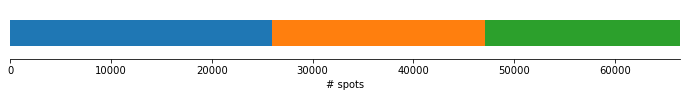

In [19]:
counts_per_reg = {}
for reg in ['Proximal', 'Middle', 'Distal']:
    counts_per_reg[reg] = [np.sum(adata_lambdas.obs['Region'] == reg)]

df_reg = pd.DataFrame(counts_per_reg)

ax = df_reg.plot(kind='barh', stacked=True, figsize=(12,1.5), legend=False)
ax.set_xlabel('# spots')
ax.set_xlim(0, len(adata_lambdas.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_stdata_composition_oneline_region.svg')

### Supplement: breakdown of snRNA-seq dataset by cell type and age group

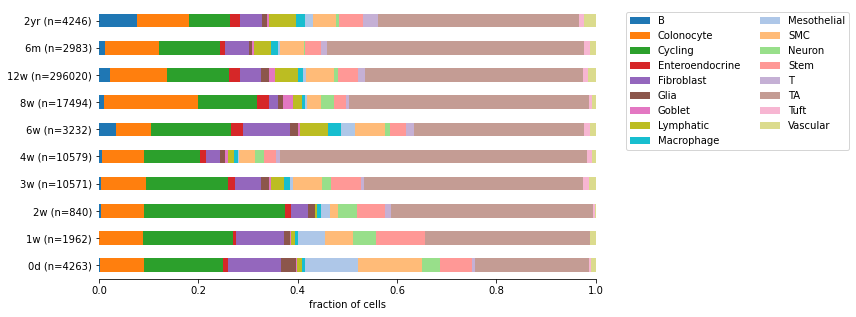

In [149]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '2yr']

counts_per_type = dict([(ct, []) for ct in pmaj_colors.keys()])
n_per_age = []

for a in ages:
    obs = adata_snrna.obs[adata_snrna.obs.age == a]
    n_per_age.append(len(obs))
    for ct in pmaj_colors.keys():
        counts_per_type[ct].append(np.sum(obs['pheno_major_cell_types'] == ct) / len(obs))

df_cpt = pd.DataFrame(counts_per_type, index=ages)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,5), color=pmaj_colors)
ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('fraction of cells')
ax.set_xlim(0, 1)
ax.set_yticklabels(['%s (n=%d)' % (a,n) for a,n in zip(ages, n_per_age)])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(right=0.7)
plt.savefig('sfig1_sndata_composition_k17.svg', format='SVG')
plt.show()

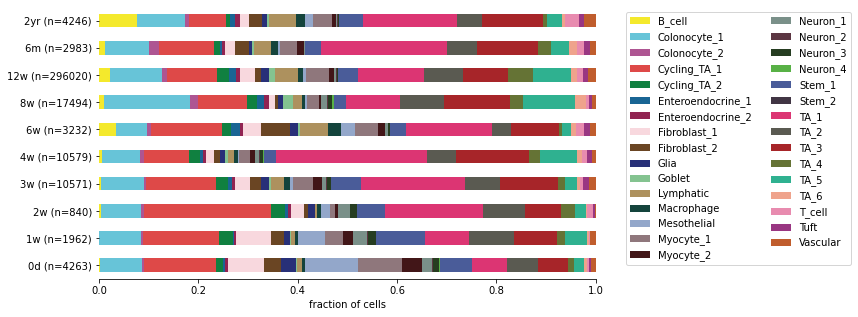

In [29]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '2yr']

counts_per_type = dict([(ct, []) for ct in p_colors.keys()])
n_per_age = []

for a in ages:
    obs = adata_snrna.obs[adata_snrna.obs.age == a]
    n_per_age.append(len(obs))
    for ct in p_colors.keys():
        counts_per_type[ct].append(np.sum(obs['pheno_cell_types'] == ct) / len(obs))

df_cpt = pd.DataFrame(counts_per_type, index=ages)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,5), color=p_colors)
ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('fraction of cells')
ax.set_xlim(0, 1)
ax.set_yticklabels(['%s (n=%d)' % (a,n) for a,n in zip(ages, n_per_age)])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(right=0.7)
plt.savefig('sfig1_sndata_composition_k31.svg', format='SVG')
plt.show()

In [100]:
adata_lambdas.obs.Age.cat.categories

Index(['0w', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '26w', '52w', '104w'], dtype='object')